In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from fiona.crs import from_epsg  # Import for setting CRS
from unidecode import unidecode
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder



In [2]:
olist_customers_dataset = pd.read_csv('Dataset/olist_customers_dataset.csv')
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
olist_geolocation_dataset = pd.read_csv('Dataset/olist_geolocation_dataset.csv')
olist_geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
df = olist_customers_dataset.set_index('customer_zip_code_prefix').join(olist_geolocation_dataset.set_index('geolocation_zip_code_prefix'))

In [5]:
# Set the path to your shapefile
filepath = "gadm41_BRA_1.shp"

# Read the shapefile
gdf = gpd.read_file(filepath)

# Display the first few rows of the GeoDataFrame
gdf.columns

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')

In [6]:
gdf.head(20)

,GID_1,GID_0,COUNTRY,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1,geometry
0,BRA.1_1,BRA,Brazil,Acre,NA,NA,Estado,State,NA,BR.AC,BR-AC,"MULTIPOLYGON (((-68.40331 -11.05351, -68.4071 ..."
1,BRA.2_1,BRA,Brazil,Alagoas,NA,NA,Estado,State,NA,BR.AL,BR-AL,"MULTIPOLYGON (((-36.30038 -10.34659, -36.30016..."
2,BRA.3_1,BRA,Brazil,Amapá,NA,NA,Estado,State,NA,BR.AP,NA,"MULTIPOLYGON (((-51.21636 -0.11861, -51.2197 -..."
3,BRA.4_1,BRA,Brazil,Amazonas,Amazone,NA,Estado,State,NA,BR.AM,BR-AM,"POLYGON ((-68.2199 -9.24275, -68.22015 -9.2426..."
4,BRA.5_1,BRA,Brazil,Bahia,Ba¡a,NA,Estado,State,NA,BR.BA,BR-BA,"MULTIPOLYGON (((-39.2627 -17.83962, -39.2636 -..."
5,BRA.6_1,BRA,Brazil,Ceará,NA,NA,Estado,State,NA,BR.CE,NA,"POLYGON ((-38.72537 -7.62901, -38.7284 -7.6307..."
6,BRA.7_1,BRA,Brazil,Distrito Federal,NA,NA,Distrito Federal,Federal District,NA,BR.DF,BR-DF,"POLYGON ((-47.3085 -16.04997, -47.30997 -16.04..."
7,BRA.8_1,BRA,Brazil,Espírito Santo,Espiritu Santo,NA,Estado,State,NA,BR.ES,NA,"MULTIPOLYGON (((-40.88336 -21.16272, -40.88329..."
8,BRA.9_1,BRA,Brazil,Goiás,Goiáz|Goyáz,NA,Estado,State,NA,BR.GO,NA,"POLYGON ((-51.09884 -19.30573, -51.09983 -19.3..."
9,BRA.10_1,BRA,Brazil,Maranhão,São Luíz de Maranhão,NA,Estado,State,NA,BR.MA,NA,"MULTIPOLYGON (((-45.54023 -7.86253, -45.54057 ..."


In [7]:
df_unique = df.drop_duplicates(subset='customer_unique_id')
# df_unique.size
# Create a geometry column from latitude and longitude
df_unique.set_index('customer_unique_id', inplace=True)

df_unique.index
# print(df_unique.size)
# # df_unique = df_unique.drop_duplicates()
# # print(df_unique.size)
df_unique['geometry'] = df_unique.apply(lambda row: Point(row['geolocation_lng'], row['geolocation_lat']), axis=1)
# df_unique['geometry'] = df_unique.apply(lambda row: Point(row['geolocation_lat'], row['geolocation_lng']), axis=1)
# df_unique.size

# print(df_unique.index.duplicated())  # Check for duplicate index labels
# print(df_unique.columns.duplicated())  # Check for duplicate column labels
# df.size

# Convert to GeoDataFrame with WGS84 CRS (EPSG:4326)
# olist_gdf = gpd.GeoDataFrame(df_unique, geometry='geometry')
olist_gdf = gpd.GeoDataFrame(df_unique, geometry='geometry', crs=from_epsg(31982))
# olist_gdf = gpd.GeoDataFrame(df_unique, geometry='geometry', crs=from_epsg(4326))



/tmp/ipykernel_206617/1185850529.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['geometry'] = df_unique.apply(lambda row: Point(row['geolocation_lng'], row['geolocation_lat']), axis=1)


In [8]:
olist_orders_dataset = pd.read_csv('Dataset/olist_orders_dataset.csv')
olist_order_payments_dataset = pd.read_csv('Dataset/olist_order_payments_dataset.csv')

df_unique_reindexed = df_unique.reset_index()

spent_df = (df_unique_reindexed
        .set_index('customer_id')
        .join(olist_orders_dataset.set_index('customer_id'))
        .set_index('order_id')
        .join(olist_order_payments_dataset.set_index('order_id'))
        .groupby(['customer_unique_id'])['payment_value']
        .sum()
        .sort_values(ascending=False)
    )   

spent_df.head()

spent_per_location_df = df_unique.join(spent_df)

payment_gdf = gpd.GeoDataFrame(spent_per_location_df, geometry='geometry', crs=from_epsg(31982))
payment_gdf.sort_values(by='payment_value', inplace=True, ascending=False)



/tmp/ipykernel_206617/13439263.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose your colormap


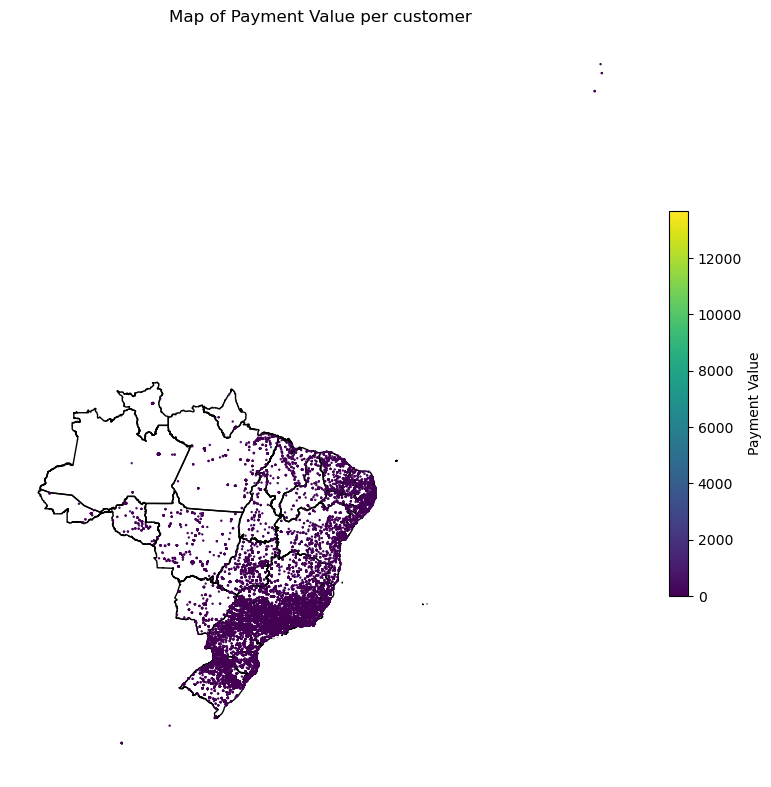

In [9]:
# Normalize payment_value for color mapping
norm = plt.Normalize(payment_gdf['payment_value'].min(), payment_gdf['payment_value'].max())

# Create a colormap
cmap = cm.get_cmap('viridis')  # Choose your colormap
# Create a plot of the GeoDataFram
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, figsize=(10, 10), color='none', edgecolor='black')
# Map payment_value to colors
colors = [cmap(norm(value)) for value in payment_gdf['payment_value']]
payment_gdf.plot(ax=ax, color=colors, markersize=0.5)  # Adjust markersize as needed
# olist_gdf.plot()

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
plt.colorbar(sm, ax=ax, label='Payment Value', shrink=0.5)

# Set title and remove axes
plt.title('Map of Payment Value per customer')
plt.axis('off')  # Turn off the axis
plt.show()

/tmp/ipykernel_206617/499103436.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose your colormap


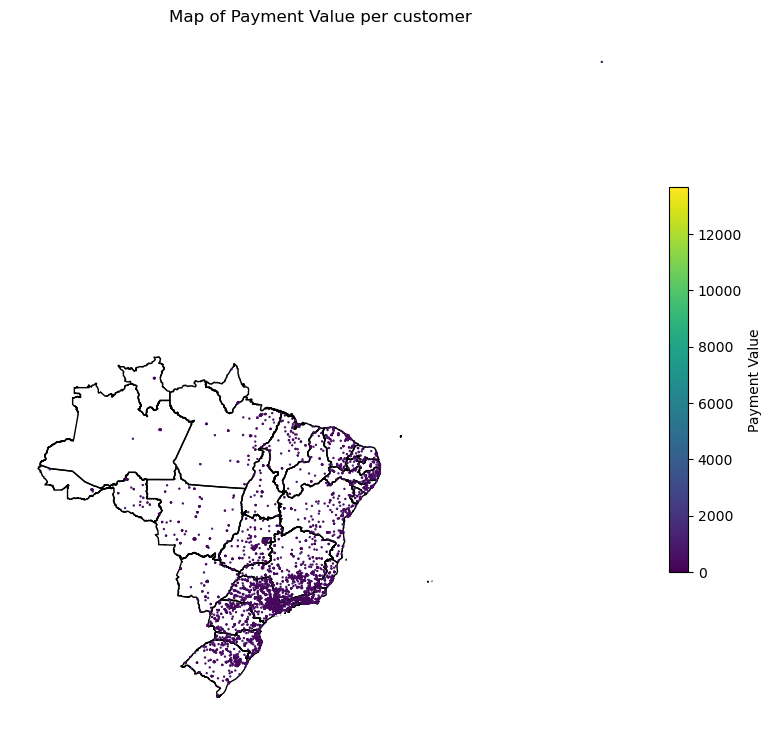

,customer_id,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry,payment_value
customer_unique_id,,,,,,,,,
0a0a92112bd4c708ca5fde585afaa872,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,-22.901095,-43.182559,rio de janeiro,RJ,POINT (-43.183 -22.901),13664.08
763c8b1c9c68a0229c42c9fc6f662b93,ec5b2ba62e574342386871631fafd3fc,vila velha,ES,-20.376161,-40.305294,vila velha,ES,POINT (-40.305 -20.376),7274.88
dc4802a71eae9be1dd28f5d788ceb526,c6e2731c5b391845f6800c97401a43a9,campo grande,MS,-20.500241,-54.568666,campo grande,MS,POINT (-54.569 -20.5),6929.31
459bef486812aa25204be022145caa62,f48d464a0baaea338cb25f816991ab1f,vitoria,ES,-20.274743,-40.284131,vitoria,ES,POINT (-40.284 -20.275),6922.21
ff4159b92c40ebe40454e3e6a7c35ed6,3fd6777bbce08a352fddd04e4a7cc8f6,marilia,SP,-22.205949,-49.954940,marilia,SP,POINT (-49.955 -22.206),6726.66


In [10]:
# Normalize payment_value for color mapping
high_payment_df = payment_gdf[:int(0.1*len(payment_gdf))]
norm = plt.Normalize(payment_gdf['payment_value'].min(), payment_gdf['payment_value'].max())

# Create a colormap
cmap = cm.get_cmap('viridis')  # Choose your colormap
# Create a plot of the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, figsize=(10, 10), color='none', edgecolor='black')
# Map payment_value to colors
colors = [cmap(norm(value)) for value in high_payment_df['payment_value']]
high_payment_df.plot(ax=ax, color=colors, markersize=0.5)  # Adjust markersize as needed
# olist_gdf.plot()

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
plt.colorbar(sm, ax=ax, label='Payment Value', shrink=0.5)

# Set title and remove axes
plt.title('Map of Payment Value per customer')
plt.axis('off')  # Turn off the axis
plt.show()
high_payment_df.head()

/tmp/ipykernel_206617/499103436.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose your colormap


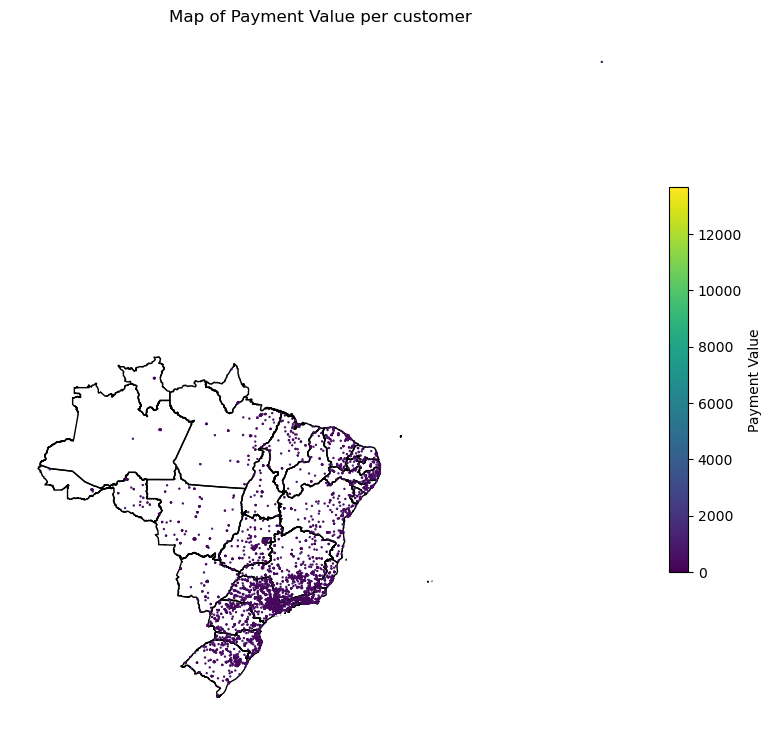

,customer_id,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry,payment_value
customer_unique_id,,,,,,,,,
0a0a92112bd4c708ca5fde585afaa872,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,-22.901095,-43.182559,rio de janeiro,RJ,POINT (-43.183 -22.901),13664.08
763c8b1c9c68a0229c42c9fc6f662b93,ec5b2ba62e574342386871631fafd3fc,vila velha,ES,-20.376161,-40.305294,vila velha,ES,POINT (-40.305 -20.376),7274.88
dc4802a71eae9be1dd28f5d788ceb526,c6e2731c5b391845f6800c97401a43a9,campo grande,MS,-20.500241,-54.568666,campo grande,MS,POINT (-54.569 -20.5),6929.31
459bef486812aa25204be022145caa62,f48d464a0baaea338cb25f816991ab1f,vitoria,ES,-20.274743,-40.284131,vitoria,ES,POINT (-40.284 -20.275),6922.21
ff4159b92c40ebe40454e3e6a7c35ed6,3fd6777bbce08a352fddd04e4a7cc8f6,marilia,SP,-22.205949,-49.954940,marilia,SP,POINT (-49.955 -22.206),6726.66


In [11]:
# Normalize payment_value for color mapping
high_payment_df = payment_gdf[:int(0.1*len(payment_gdf))]
norm = plt.Normalize(payment_gdf['payment_value'].min(), payment_gdf['payment_value'].max())

# Create a colormap
cmap = cm.get_cmap('viridis')  # Choose your colormap
# Create a plot of the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, figsize=(10, 10), color='none', edgecolor='black')
# Map payment_value to colors
colors = [cmap(norm(value)) for value in high_payment_df['payment_value']]
high_payment_df.plot(ax=ax, color=colors, markersize=0.5)  # Adjust markersize as needed
# olist_gdf.plot()

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
plt.colorbar(sm, ax=ax, label='Payment Value', shrink=0.5)

# Set title and remove axes
plt.title('Map of Payment Value per customer')
plt.axis('off')  # Turn off the axis
plt.show()
high_payment_df.head()

In [12]:
spent_df = (df_unique_reindexed
        .set_index('customer_id')
        .join(olist_orders_dataset.set_index('customer_id'))
        .set_index('order_id')
        .join(olist_order_payments_dataset.set_index('order_id'))
)

spent_df['order_purchase_timestamp'] = pd.to_datetime(spent_df['order_purchase_timestamp'])

# spent_df.groupby(['customer_unique_id'])['payment_value'].sum()
monthly_spend = pd.DataFrame(spent_df.groupby(['customer_unique_id', spent_df['order_purchase_timestamp'].dt.month])['payment_value'].sum().sort_values())

# monthly_spend['order_purchase_timestamp']
condition = monthly_spend.index.get_level_values('order_purchase_timestamp') == 1
monthly_spend[condition].droplevel('order_purchase_timestamp').join(df_unique)

,payment_value,customer_id,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
customer_unique_id,,,,,,,,,
82764b80d068287bdfb77df016b68d96,14.08,63eba5144d1e863052f1b154a402b7bb,itatiba,SP,-23.022089,-46.846145,itatiba,SP,POINT (-46.84614507475785 -23.02208878722264)
e4830071207eb6aa2f738dc965f05f50,14.65,bbeac8b201688b9c1ae8b64ff59f8b76,sao paulo,SP,-23.698010,-46.708370,são paulo,SP,POINT (-46.70836982653356 -23.69800956174625)
3b86802bfba1e5e5ca2ae9923a2686be,14.78,81fc34430fe53bb8eb3b8de3481e0353,itu,SP,-23.277920,-47.297777,itu,SP,POINT (-47.29777730942436 -23.27791979536116)
4079d39cb3fdea47201540107c1673dc,14.86,3bb0f1d5881cfaf2de8eacdbe88b2d58,franco da rocha,SP,-23.325328,-46.733637,franco da rocha,SP,POINT (-46.733637110975415 -23.325327646387912)
04544a89f79714c0abcc3ae49e884209,15.71,0c9250b6e51b94c3250b3992631fb100,sao paulo,SP,-23.550011,-46.648182,sao paulo,SP,POINT (-46.64818240521669 -23.55001132944774)
...,...,...,...,...,...,...,...,...,...
c77dde0ffa573d733a5afe93774246ec,2152.92,73236a0796f53d60d4530e30df0cef8d,rio de janeiro,RJ,-23.004309,-43.324508,rio de janeiro,RJ,POINT (-43.32450783783356 -23.0043086872296)
3895f60f6e6a89e5cfb7b72ffdcdf7e0,2204.04,2d54c241a27d5c40c9adf389868e0995,salvador,BA,-12.961184,-38.470405,salvador,BA,POINT (-38.4704046479672 -12.961183583362743)
bd8717655febcdf30f106e9f3cb24628,2217.99,c3ab6358d2556844d38ed5dbab0b41ce,quarai,RS,-30.391330,-56.451258,quarai,RS,POINT (-56.45125803065783 -30.39132996595941)


/tmp/ipykernel_206617/3916718257.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose your colormap
/tmp/ipykernel_206617/3916718257.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose your colormap
/tmp/ipykernel_206617/3916718257.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose your colormap
/tmp/ipykernel_206617/3916718257.py:14: Matplo

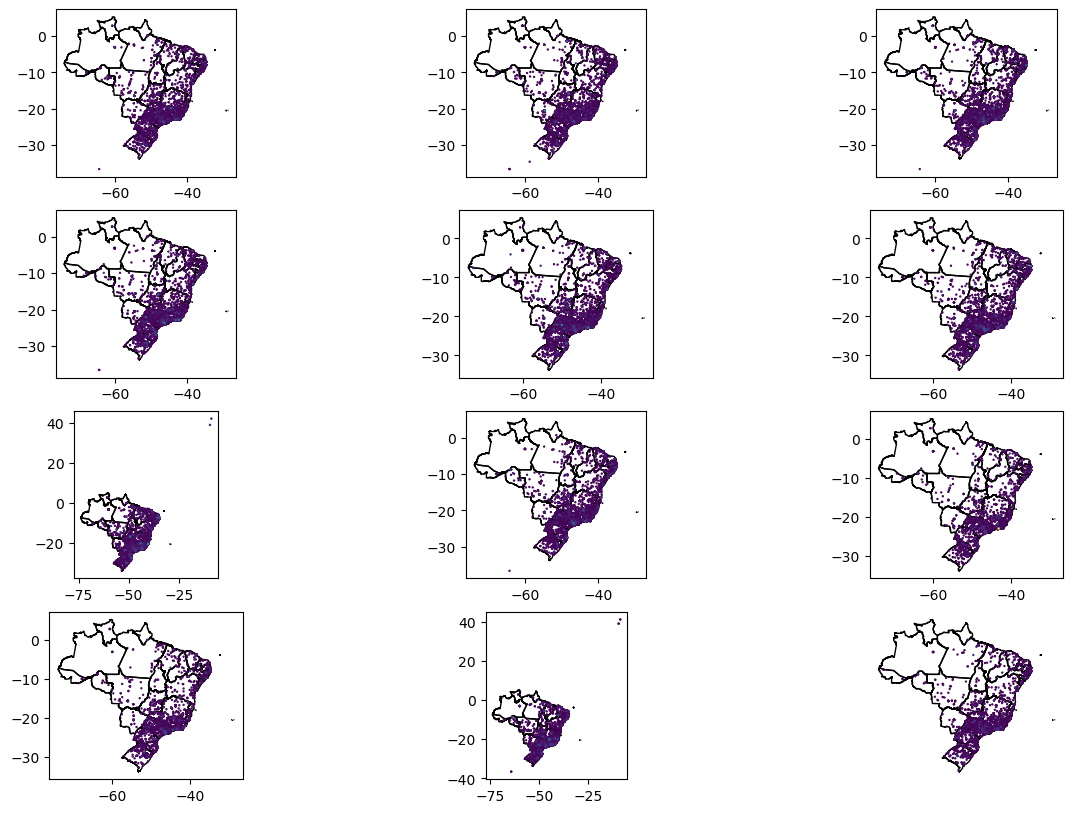

In [13]:
# Create a figure and a 4x3 grid of subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
norm = plt.Normalize(payment_gdf['payment_value'].min(), payment_gdf['payment_value'].max())

for i in range(1,13):
    condition_1 = monthly_spend.index.get_level_values('order_purchase_timestamp') == i
    condition_2 = monthly_spend.payment_value > 0
    month_df = monthly_spend[condition_1&condition_2].droplevel('order_purchase_timestamp').join(df_unique)
    payment_gdf = gpd.GeoDataFrame(month_df, geometry='geometry', crs=from_epsg(31982))
    # print(payment_gdf)
    # Normalize payment_value for color mapping

    # Create a colormap
    cmap = cm.get_cmap('viridis')  # Choose your colormap
    # Create a plot of the GeoDataFrame
    gdf.plot(ax=axs[int((i-1)/3), (i-1) % 3], figsize=(10, 10), color='none', edgecolor='black')
    # Map payment_value to colors
    colors = [cmap(norm(value)) for value in payment_gdf['payment_value']]
    payment_gdf.plot(ax=axs[int((i-1)/3), (i-1) % 3], color=colors, markersize=0.5)  # Adjust markersize as needed
    # olist_gdf.plot()

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Only needed for older versions of matplotlib
    plt.colorbar(sm, ax=ax, label='Payment Value', shrink=0.5)

    # Set title and remove axes
    # plt.title('Map of Payment Value per customer')
    plt.axis('off')  # Turn off the axis

# plt.show()


In [14]:
olist_orders_dataset = pd.read_csv('Dataset/olist_orders_dataset.csv')
olist_order_payments_dataset = pd.read_csv('Dataset/olist_order_payments_dataset.csv')

df_unique_reindexed = df_unique.reset_index()

spent_df = (df_unique_reindexed
        .set_index('customer_id')
        .join(olist_orders_dataset.set_index('customer_id'))
        .set_index('order_id')
        .join(olist_order_payments_dataset.set_index('order_id'))
        .groupby(['customer_unique_id'])['payment_value']
        .count()
        .sort_values(ascending=False)
    )   

spent_df.head()

purchase_frequency_per_location_df = df_unique.join(spent_df)

frequency_gdf = gpd.GeoDataFrame(purchase_frequency_per_location_df , geometry='geometry', crs=from_epsg(31982))
frequency_gdf.sort_values(by='payment_value', inplace=True, ascending=False)
frequency_gdf.head()



,customer_id,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry,payment_value
customer_unique_id,,,,,,,,,
8af7ac63b2efbcbd88e5b11505e8098a,9af2372a1e49340278e7c1ef8d749f34,cuiaba,MT,-15.615363,-56.076605,cuiaba,MT,POINT (-56.077 -15.615),29
569aa12b73b5f7edeaa6f2a01603e381,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,-23.598729,-46.535867,sao paulo,SP,POINT (-46.536 -23.599),26
2524dcec233c3766f2c2b22f69fd65f4,b246eeed30b362c09d867b9e598bee51,tupa,SP,-21.942739,-50.523017,tupa,SP,POINT (-50.523 -21.943),22
9a736b248f67d166d2fbb006bcb877c3,270c23a11d024a44c896d1894b261a83,sao paulo,SP,-23.583687,-46.569762,sao paulo,SP,POINT (-46.57 -23.584),21
24f12460aad399ba18f4ed2c2fbab65d,eed931d3a5222a9a511d18be7fd2a5ba,campinas,SP,-22.895876,-47.079185,campinas,SP,POINT (-47.079 -22.896),19


/tmp/ipykernel_206617/2064585990.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose your colormap


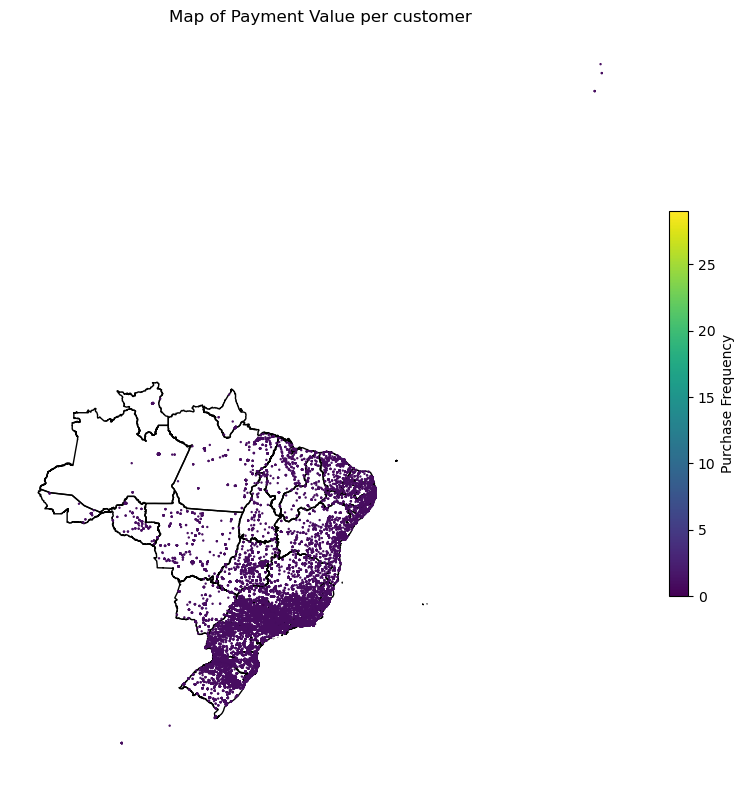

In [15]:
# Normalize payment_value for color mapping
norm = plt.Normalize(frequency_gdf['payment_value'].min(), frequency_gdf['payment_value'].max())

# Create a colormap
cmap = cm.get_cmap('viridis')  # Choose your colormap
# Create a plot of the GeoDataFram
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, figsize=(10, 10), color='none', edgecolor='black')
# Map payment_value to colors
colors = [cmap(norm(value)) for value in frequency_gdf['payment_value']]
frequency_gdf.plot(ax=ax, color=colors, markersize=0.5)  # Adjust markersize as needed
# olist_gdf.plot()

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
plt.colorbar(sm, ax=ax, label='Purchase Frequency', shrink=0.5)

# Set title and remove axes
plt.title('Map of Payment Value per customer')
plt.axis('off')  # Turn off the axis
plt.show()

/tmp/ipykernel_206617/2039890189.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose your colormap


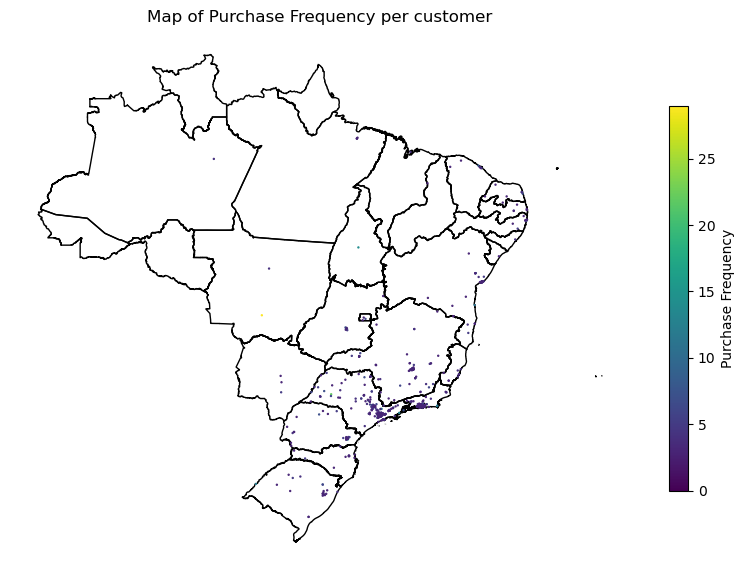

,customer_id,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry,payment_value
customer_unique_id,,,,,,,,,
8af7ac63b2efbcbd88e5b11505e8098a,9af2372a1e49340278e7c1ef8d749f34,cuiaba,MT,-15.615363,-56.076605,cuiaba,MT,POINT (-56.077 -15.615),29
569aa12b73b5f7edeaa6f2a01603e381,92cd3ec6e2d643d4ebd0e3d6238f69e2,sao paulo,SP,-23.598729,-46.535867,sao paulo,SP,POINT (-46.536 -23.599),26
2524dcec233c3766f2c2b22f69fd65f4,b246eeed30b362c09d867b9e598bee51,tupa,SP,-21.942739,-50.523017,tupa,SP,POINT (-50.523 -21.943),22
9a736b248f67d166d2fbb006bcb877c3,270c23a11d024a44c896d1894b261a83,sao paulo,SP,-23.583687,-46.569762,sao paulo,SP,POINT (-46.57 -23.584),21
24f12460aad399ba18f4ed2c2fbab65d,eed931d3a5222a9a511d18be7fd2a5ba,campinas,SP,-22.895876,-47.079185,campinas,SP,POINT (-47.079 -22.896),19


In [16]:
# Normalize payment_value for color mapping
high_frequency_df = frequency_gdf[:int(0.1*len(payment_gdf))]
norm = plt.Normalize(frequency_gdf['payment_value'].min(), frequency_gdf['payment_value'].max())

# Create a colormap
cmap = cm.get_cmap('viridis')  # Choose your colormap
# Create a plot of the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, figsize=(10, 10), color='none', edgecolor='black')
# Map payment_value to colors
colors = [cmap(norm(value)) for value in high_frequency_df['payment_value']]
high_frequency_df.plot(ax=ax, color=colors, markersize=0.5)  # Adjust markersize as needed
# olist_gdf.plot()

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for older versions of matplotlib
plt.colorbar(sm, ax=ax, label='Purchase Frequency', shrink=0.5)

# Set title and remove axes
plt.title('Map of Purchase Frequency per customer')
plt.axis('off')  # Turn off the axis
plt.show()
high_frequency_df.head()

In [17]:
spent_df = (df_unique_reindexed
        .set_index('customer_id')
        .join(olist_orders_dataset.set_index('customer_id'))
        .set_index('order_id')
        .join(olist_order_payments_dataset.set_index('order_id'))
)

spent_df['order_purchase_timestamp'] = pd.to_datetime(spent_df['order_purchase_timestamp'])

# spent_df.groupby(['customer_unique_id'])['payment_value'].sum()
monthly_frequency = pd.DataFrame(spent_df.groupby(['customer_unique_id', spent_df['order_purchase_timestamp'].dt.month])['payment_value'].count().sort_values())

# monthly_spend['order_purchase_timestamp']
condition = monthly_frequency.index.get_level_values('order_purchase_timestamp') == 1
monthly_frequency[condition].droplevel('order_purchase_timestamp').join(df_unique)

,payment_value,customer_id,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
customer_unique_id,,,,,,,,,
a90bbf7b5df8db48d17feac3314636e5,1,d3cb6584f820e1ade0b4c054fe5b0e1c,maringa,PR,-23.423386,-51.952037,maringá,PR,POINT (-51.95203743140284 -23.423386352936397)
a908f7551bf4ad06732bd84eff560037,1,bae2e17717f1e6f357bbac0107dabfd6,teofilo otoni,MG,-17.855632,-41.515698,teofilo otoni,MG,POINT (-41.51569800863798 -17.85563237928638)
a91913d94fec6055b4b00fff604deb12,1,cfa0018ea537f7a14133c72d679afd74,rio de janeiro,RJ,-22.869335,-43.219928,rio de janeiro,RJ,POINT (-43.21992800026346 -22.86933515510882)
a8ed24537ad1fbef1fb6f0b58ad39d01,1,19f4e983f8f05b7de16670f8a0cf0ac7,taquarituba,SP,-23.546936,-49.244245,taquarituba,SP,POINT (-49.24424537825799 -23.546936026090403)
a8e911d5eaf0892701f189303c0e0559,1,19e82b646b98e2385f2651c33efd6e5a,rio de janeiro,RJ,-22.975520,-43.484361,rio de janeiro,RJ,POINT (-43.48436102271125 -22.97552030068124)
...,...,...,...,...,...,...,...,...,...
94bd5dee83e9590368179f4ab026b4f4,6,276df8efcf9602ecddaa00e349eb79b3,caxias do sul,RS,-29.179289,-51.192118,caxias do sul,RS,POINT (-51.19211762043794 -29.17928910622808)
f71d1ce0ca77b13eb4a0909685c1a288,7,e73a40f7509a5e81a764029d4b7ea836,belo horizonte,MG,-19.908552,-43.996105,belo horizonte,MG,POINT (-43.99610515805876 -19.9085515567546)
56437a026e07b2b2271b8742aee81fb9,7,cff157deadf46de66ac1eb7ead76deb0,indaiatuba,SP,-23.102253,-47.182096,indaiatuba,SP,POINT (-47.182096252041575 -23.10225337735851)


/tmp/ipykernel_206617/3613250617.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')  # Choose your colormap


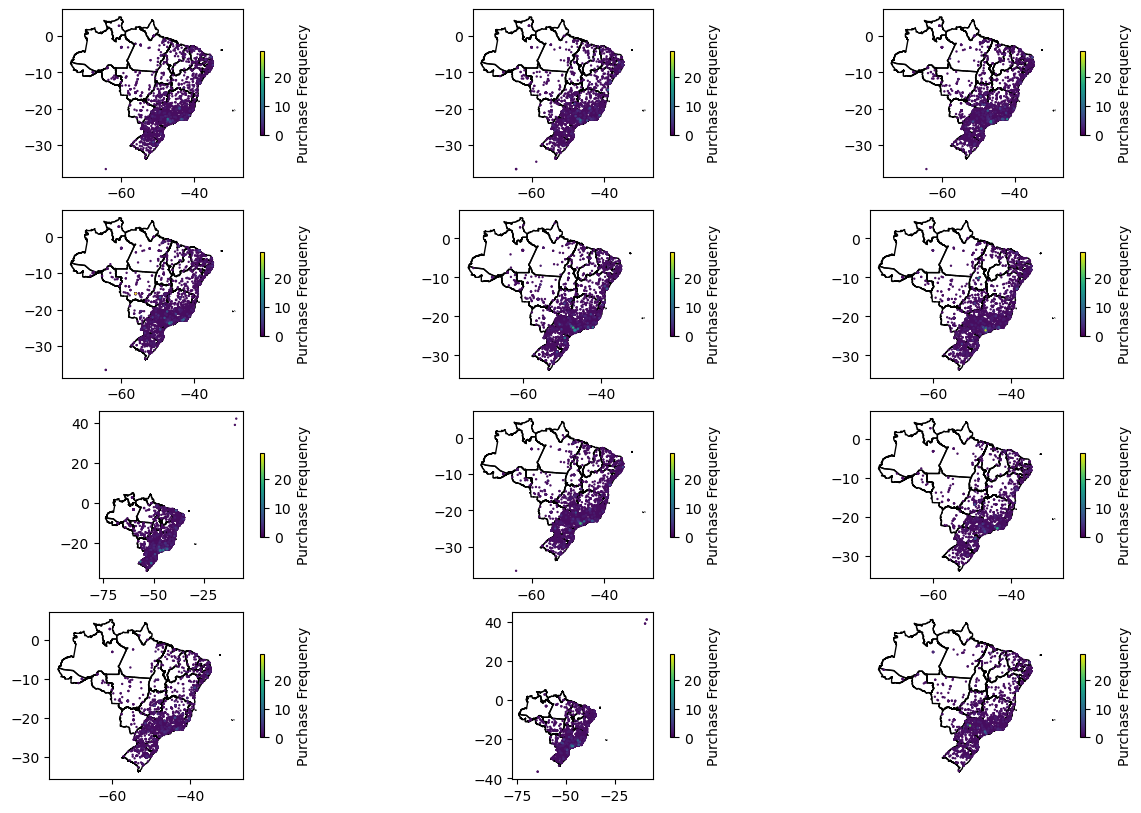

In [18]:
# Create a figure and a 4x3 grid of subplots
fig, axs = plt.subplots(4, 3, figsize=(15, 10))
norm = plt.Normalize(frequency_gdf['payment_value'].min(), frequency_gdf['payment_value'].max())
cmap = cm.get_cmap('viridis')  # Choose your colormap

for i in range(1,13):
    ax = axs[int((i-1)/3), (i-1) % 3]
    condition_1 = monthly_frequency.index.get_level_values('order_purchase_timestamp') == i
    condition_2 = monthly_frequency.payment_value > 0
    month_df = monthly_frequency[condition_1&condition_2].droplevel('order_purchase_timestamp').join(df_unique)

    # Create a plot of the GeoDataFrame
    frequency_gdf = gpd.GeoDataFrame(month_df, geometry='geometry', crs=from_epsg(31982))

    gdf.plot(ax=ax, figsize=(10, 10), color='none', edgecolor='black')
    # Map payment_value to colors
    colors = [cmap(norm(value)) for value in frequency_gdf['payment_value']]
    frequency_gdf.plot(ax=ax, color=colors, markersize=0.5)  # Adjust markersize as needed
    # olist_gdf.plot()

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Only needed for older versions of matplotlib
    plt.colorbar(sm, ax=ax, label='Purchase Frequency', shrink=0.5)

    # Set title and remove axes
    # plt.title('Map of Payment Value per customer')
    plt.axis('off')  # Turn off the axis

# plt.show()


# seasonality

In [19]:

olist_orders_dataset = pd.read_csv('Dataset/olist_orders_dataset.csv')
olist_order_payments_dataset = pd.read_csv('Dataset/olist_order_payments_dataset.csv')

df_unique_reindexed = df_unique.reset_index()

spent_df = (df_unique_reindexed
        .set_index('customer_id')
        .join(olist_orders_dataset.set_index('customer_id'))
        .set_index('order_id')
        .join(olist_order_payments_dataset.set_index('order_id'))
    )   
spent_df['order_purchase_timestamp'] = pd.to_datetime(spent_df['order_purchase_timestamp'])
month = spent_df.groupby(spent_df['order_purchase_timestamp'].dt.day)['payment_value']
day = spent_df.groupby(spent_df['order_purchase_timestamp'].dt.hour)['payment_value']



# payment_gdf = gpd.GeoDataFrame(spent_per_location_df, geometry='geometry', crs=from_epsg(31982))
# payment_gdf.sort_values(by='payment_value', inplace=True, ascending=False)



Text(0.5, 1.0, 'Number of Purchases per Hour of the Day')

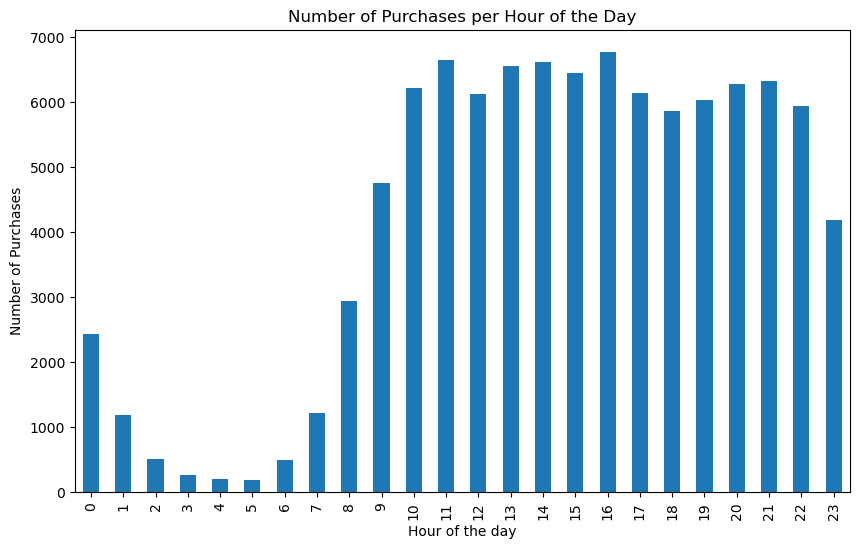

In [20]:
# Assuming month_spent is your DataFrame or Series
ax = day.count().plot.bar(figsize=(10, 6))  # Create the bar plot

# Add labels and title
ax.set_ylabel('Number of Purchases')  # Replace with your actual x-axis label
ax.set_xlabel('Hour of the day')  # Replace with your actual y-axis label
ax.set_title('Number of Purchases per Hour of the Day')  # Replace with your desired title

Text(0.5, 1.0, 'Number of Purchases per Day')

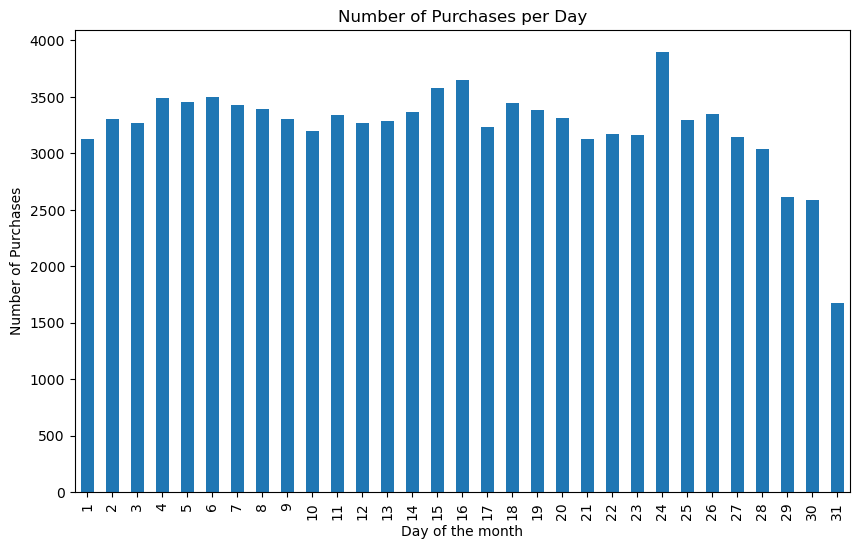

In [21]:
# Assuming month_spent is your DataFrame or Series
ax = month.count().plot.bar(figsize=(10, 6))  # Create the bar plot

# Add labels and title
ax.set_ylabel('Number of Purchases')  # Replace with your actual x-axis label
ax.set_xlabel('Day of the month')  # Replace with your actual y-axis label
ax.set_title('Number of Purchases per Day')  # Replace with your desired title

# correlation

/tmp/ipykernel_206617/3746603997.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df[date_col] = pd.to_datetime(target_df[date_col])
/tmp/ipykernel_206617/3746603997.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df[date_col] = pd.to_datetime(target_df[date_col])
/tmp/ipykernel_206617/3746603997.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

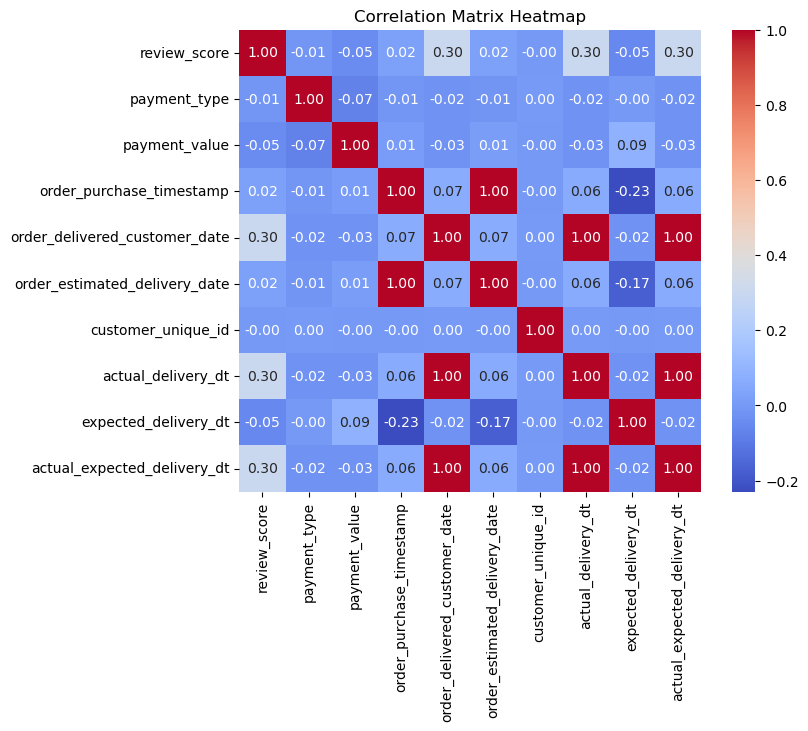

In [22]:
target_cols = ['review_score', 'payment_type', 'payment_value', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'customer_unique_id']

olist_order_reviews_dataset = pd.read_csv('Dataset/olist_order_reviews_dataset.csv')


df = (
    olist_order_reviews_dataset.set_index('order_id')
    .join(olist_orders_dataset.set_index('order_id'))
    .join(olist_order_payments_dataset.set_index('order_id'))
    .set_index('customer_id')
    .join(olist_customers_dataset.set_index('customer_id'))
)

target_df = df[target_cols]
date_cols = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for date_col in date_cols:
    target_df[date_col] = pd.to_datetime(target_df[date_col])

target_df['actual_delivery_dt'] = target_df['order_delivered_customer_date'] - target_df['order_purchase_timestamp']
target_df['expected_delivery_dt'] = target_df['order_estimated_delivery_date'] - target_df['order_purchase_timestamp'] 
target_df['actual_expected_delivery_dt'] = target_df['expected_delivery_dt'] - target_df['actual_delivery_dt']

encoder = OrdinalEncoder()
target_df['payment_type'] = encoder.fit_transform(target_df[['payment_type']])
target_df['customer_unique_id'] = encoder.fit_transform(target_df[['customer_unique_id']])

corr_matrix = target_df.corr()
# corr_matrix = target_df.select_dtypes(exclude='object').corr()

# Step 3: Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()



# top 10 payment value per product category

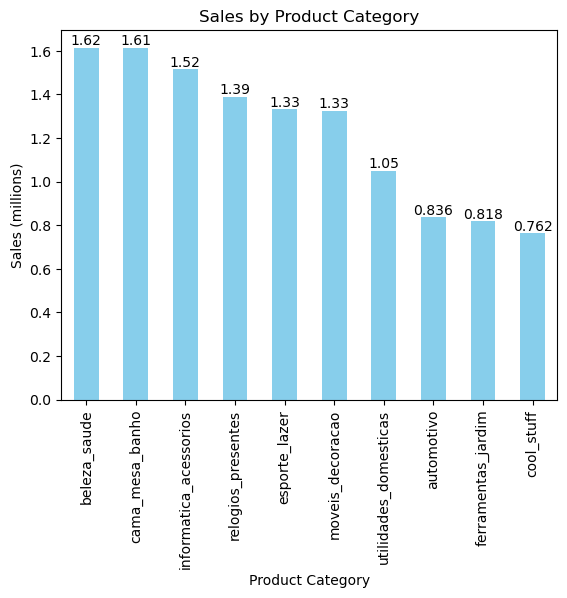

In [23]:
olist_order_items_dataset = pd.read_csv('Dataset/olist_order_items_dataset.csv')
olist_products_dataset = pd.read_csv('Dataset/olist_products_dataset.csv')
value_cat_df = (spent_df
                .join(olist_order_items_dataset.set_index('order_id'))
                .set_index('product_id')
                .join(olist_products_dataset.set_index('product_id'))
)

value_cat_df['payment_value'] = value_cat_df['payment_value']/1000000
top_cat = value_cat_df.groupby('product_category_name')['payment_value'].sum().sort_values(ascending=False)[:10]
top_cat_list = top_cat.index.get_level_values('product_category_name')



# Step 2: Create a bar plot
ax = top_cat.plot.bar(x='Product', y='Sales', legend=False, color='skyblue')

# Step 3: Add labels to each bar with three significant figures
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        # Format the label to three significant figures
        label = f'{height:.3g}'  # Using .3g for three significant figures
        ax.annotate(label,
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom')

# Step 4: Set title and labels
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales (millions)')

# Show the plot
plt.show()

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='order_purchase_timestamp')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='order_purchase_timestamp')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='order_purchase_timestamp')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='order_purchase_timestamp')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='order_purchase_timestamp')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='order_purchase_timestamp')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='order_purchase_timestamp')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='order_purchase_timestamp')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='order_purchase_timestamp')
Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int32', name='order_purchase_timestamp')


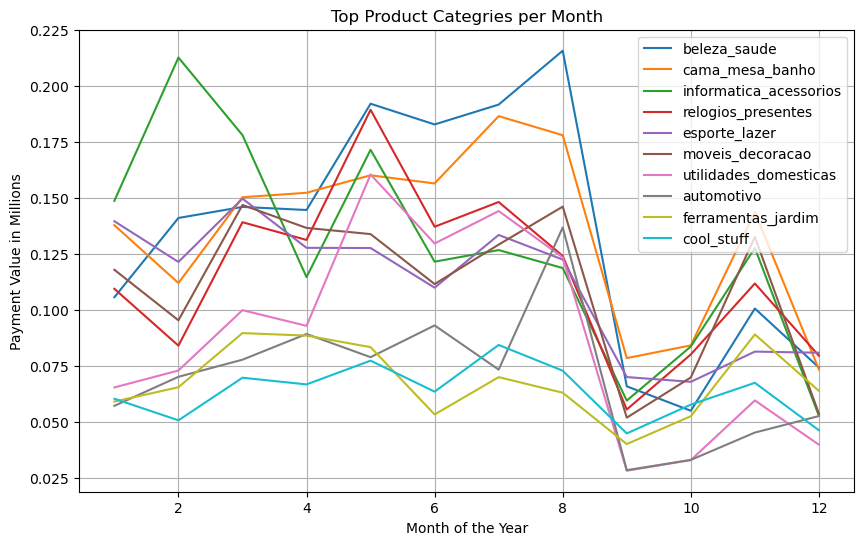

In [24]:
top_cat = value_cat_df.groupby(['product_category_name', value_cat_df['order_purchase_timestamp'].dt.month])['payment_value'].sum().sort_values(ascending=False)
# top_cat = value_cat_df.groupby(['product_category_name', value_cat_df['order_purchase_timestamp'].dt.month])['payment_value'].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(10, 6))
for product_cat in top_cat_list:
    condition_1 = top_cat.index.get_level_values('product_category_name') == product_cat 
    month_df = pd.DataFrame(top_cat[condition_1].droplevel('product_category_name')).sort_index()

    print(month_df.index)

    # Plotting multiple lines
    plt.plot(month_df.index, month_df['payment_value'], label=product_cat)

# Adding title and labels
plt.title('Top Product Categries per Month')
plt.xlabel('Month of the Year')
plt.ylabel('Payment Value in Millions')

# Adding a legend
plt.legend()

# Show the plot
plt.grid()

# plt.ylim(-2, 2)  # Limit y-axis for better visibility of tan function

# reviews analysis
classify review_comment_message

## EDA
try to wordcloud the reviews

In [25]:
import nltk
import string

new_df = olist_order_reviews_dataset.copy()
translator = str.maketrans('', '', string.punctuation)
new_df['review_comment_message'] = new_df['review_comment_message'].fillna("").astype('str')
new_df['review_comment_message'] = new_df['review_comment_message'].str.lower()
new_df['review_comment_message'] = new_df['review_comment_message'].str.translate(translator)
new_df['review_comment_message'] = new_df['review_comment_message'].str.split()

word_set = set()
for word_list in new_df['review_comment_message']:
    word_set = word_set.union(set(word_list))

print(word_set)

word_count = dict()
for word in word_set:
    word_count[word] = 0

for word_list in new_df['review_comment_message']:
    for word in list(word_list):
        word_count[word] += 1
    
dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
# nltk.word_tokenize("""hello, mama""")


{'arranhao', 'notebok', 'targaryenque', 'tu', 'amplificador', 'obrigação', 'gn', 'binóculo', 'maria', 'iquivoquei', 'emitirei', 'recomendadíssimo', 'estrupiada', 'golfinhos', 'recebemos', 'groço', 'gatas', 'fixá', 'grave', 'devolveu', 'vlrtotal', 'rádios', 'álcool', 'pensado', '2º', 'parabénsas', 'bouti', 'compradasmas', 'adotadas', 'interessa', 'complica', 'partner', 'desfez', 'estálava', 'fornecedor', 'colocamos', 'chegassem', 'inline', 'recdebi', 'resolvemretirem', 'tripé', 'lo', 'viagens', 'aprovado', 'acrilico', 'mejor', 'transpiração', 'aromatizador', 'paraguai', 'lexmark', 'qualidadeagora', 'ightning', 'pedestais', 'furações', 'técnico', '1000n', 'leitos', 'praxi', 'xtramastersó', 'difetente', 'internete', '001689', 'emrpesa', 'picareta', 'plausível', '38', 'produtosagora', 'gasolina', 'comercializar', 'lojameu', '0208', 'lástima', 'fecebi', 'prevenir', 'conformes', 'rápida', 'rápidamuito', 'uniu', 'espalhados', '0705', 'acredita', 'oakley', 'solteiro', 'pontualidade', 'preçomui

{'o': 18719,
 'produto': 18157,
 'e': 15650,
 'a': 12155,
 'de': 11306,
 'do': 11143,
 'não': 10710,
 'que': 8306,
 'prazo': 8252,
 'muito': 7822,
 'entrega': 6408,
 'antes': 5608,
 'com': 5593,
 'chegou': 5467,
 'recebi': 5235,
 'no': 5042,
 'foi': 4523,
 'é': 4513,
 'bom': 4512,
 'um': 4338,
 'recomendo': 4165,
 'entregue': 3750,
 'da': 3510,
 'em': 3486,
 'veio': 3244,
 'para': 3159,
 'bem': 3083,
 'na': 3022,
 'mas': 2840,
 'comprei': 2733,
 'qualidade': 2700,
 'uma': 2655,
 'eu': 2386,
 'loja': 2357,
 'ainda': 2304,
 'tudo': 2298,
 'compra': 2163,
 'mais': 2050,
 'meu': 2031,
 'gostei': 1861,
 'ótimo': 1789,
 'estou': 1782,
 'só': 1776,
 'excelente': 1767,
 'como': 1763,
 'até': 1745,
 'super': 1670,
 'dentro': 1453,
 'as': 1448,
 'por': 1436,
 'os': 1435,
 'me': 1413,
 'rápida': 1386,
 'minha': 1342,
 'nao': 1323,
 'boa': 1299,
 'dia': 1297,
 'pedido': 1290,
 'já': 1288,
 'produtos': 1232,
 'se': 1194,
 'site': 1164,
 'sem': 1146,
 'lannister': 1094,
 'pois': 1008,
 'mesmo': 1007

The word count may indicate which characteristics people care about like prazo(deadline), entregue (delivery). This confirms that delivery times are correlated with review score.

(-0.5, 5999.5, 1999.5, -0.5)

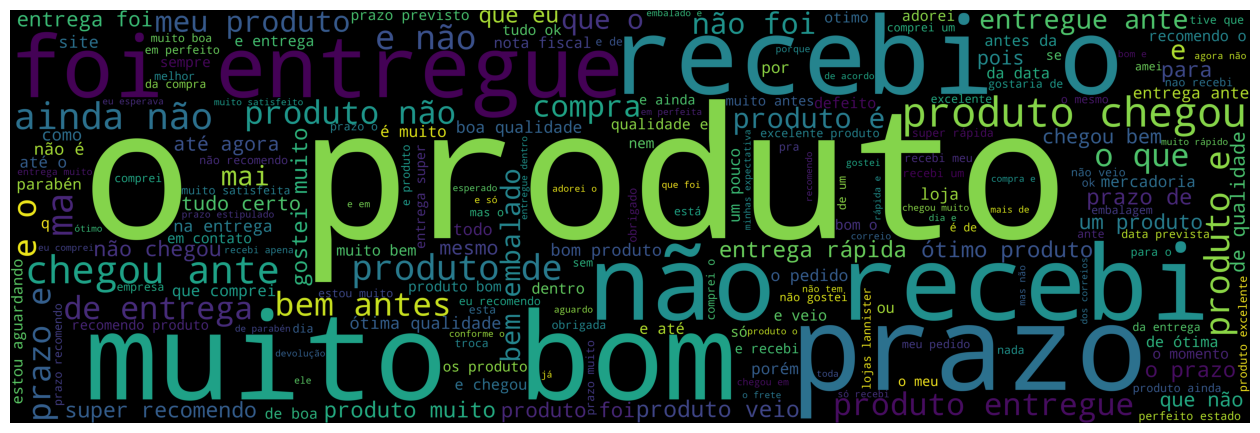

In [26]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

new_df = olist_order_reviews_dataset.copy()
translator = str.maketrans('', '', string.punctuation)
new_df['review_comment_message'] = new_df['review_comment_message'].str.lower()
new_df['review_comment_message'] = new_df['review_comment_message'].fillna("").astype('str')
review_corpus = ' '.join(new_df['review_comment_message'])
review_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=6000,).generate(review_corpus)
plt.figure(figsize=(16,8))
plt.imshow(review_wordcloud)
plt.axis('off')

Use content based filtering to recommend item to a user

In [27]:
target_cols = ['review_score', 'customer_unique_id', 'product_id']

In [36]:
new_df = (
        olist_order_reviews_dataset
        .set_index('order_id')
        .join(olist_orders_dataset.set_index('order_id'))
        .reset_index()
        .set_index('customer_id')
        .join(olist_customers_dataset.set_index('customer_id'))
        .set_index('order_id')
        .join(olist_order_items_dataset.set_index('order_id'))[target_cols]
        .reset_index()
        .drop('order_id', axis=1)
        )

grouped_df = new_df.groupby(['customer_unique_id', 'product_id'])
result_df = grouped_df.mean().reset_index()
# result_df = result_df.set_index('customer_unique_id')

In [73]:
test_df = result_df.sample(frac=0.02).pivot(index='customer_unique_id', columns='product_id', values='review_score')
user_sim = test_df.corr(method='pearson')

In [79]:
user_sim.sum(axis=0)

product_id,00250175f79f584c14ab5cecd80553cd,0030e635639c898b323826589761cf23,004636c889c7c3dad6631f136b7fa082,008cff0e5792219fae03e570f980b330,00929aaa7751a77220db9caa1ae6d3ab,00ddaddbe03b7103d80daee96892363f,00faa46f36261af8bbf3a4d37fa4841b,0105b5323d24fc655f73052694dbbb3a,010c38887e6a41a5acfea2687515b254,01586bfbe1d5449887f1cac4ad1fbd02,...,fe0be6df56c891975ff729be49fd2e17,fe6a9515d655fa7936b8a7c841039f34,fe6f03cedd96bcbc5c8726c5963fd35c,fec95e3df8533d6872300b23b9a5a943,ff149b3dcc3813d4644fa2610307d071,ff285e6c96040323d3763dd184924018,ff7fccf8513f360157f0660fe51d1d88,ffbe3df3856b1fef3fee8f1264105a89,ffc0b406806006602c5853b00ab5f7fd,fff6177642830a9a94a0f2cba5e476d1
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0012929d977a8d7280bb277c1e5f589d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0085d749fc64f766ece1729464f8039a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0096c9cb600a08e601f7c2be6734531a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
012b8001e47392df808a454083a74b74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0137420de9b02a180c53e5bd64f14750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fec4c22f245bec950cb2da65fcd20fec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fed519569d16e690df6f89cb99d4e682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ff39923a9c95c65545aacade99b7732d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
